In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
# Specify dtype option on import or set low_memory=False.
pd.options.mode.chained_assignment = None  # default='warn'

import math
import scipy

# Datviz purposes
import matplotlib.pyplot as plt
plt.style.use('bmh')
import seaborn as sns
sns.set_style('darkgrid')
import plotly.express as px
import missingno as msno

In [2]:
try :
    train_data = pd.read_csv("/kaggle/input/penyisihan-joints-data-competition-2023/train.csv", low_memory=False)
    test_data = pd.read_csv("/kaggle/input/penyisihan-joints-data-competition-2023/test.csv", low_memory=False) # For Kaggle

except :
    train_data = pd.read_csv("../1-Preprocessing/train_data.csv", low_memory=False)
    test_data = pd.read_csv("../1-Preprocessing/test_data.csv", low_memory=False) # For local

In [3]:
df = pd.DataFrame(train_data.isnull().sum())
print("\n",train_data.shape)
df


 (348982, 25)


,0
floors_before_eq(total),22424
old_building,2115
plinth_area(ft^2),59593
height_before_eq(ft),22424
land_surface_condition,13527
type_of_foundation,2115
type_of_roof,59593
type_of_ground_floor,22424
type_of_other_floor,13527
position,16536


# Missing Values

In [4]:
print("Shape of train data: ", train_data.shape)

Shape of train data:  (348982, 25)


In [5]:
# Drop row when more than 40% of the values are missing
train_data = train_data.dropna(thresh=train_data.shape[1] * 0.6, axis=0) 

In [6]:
print("Shape of train data: ", train_data.shape)

Shape of train data:  (337601, 25)


### 'technical_solution'

In [7]:
### 'technical_solution'
# Handle 'technical_solution_proposed' column
def reconstruction(x):
    if x == 'reconstruction':
        return 1
    else:
        return 0
def major_repair(x):
    if x == 'major repair':
        return 1
    else:
        return 0
def minor_repair(x):
    if x == 'minor repair':
        return 1
    else:
        return 0
def no_need(x):
    if x == 'no need':
        return 1
    else:
        return 0

train_data['reconstruction'] = train_data['technical_solution_proposed'].apply(reconstruction)
train_data['major_repair'] = train_data['technical_solution_proposed'].apply(major_repair)
train_data['minor_repair'] = train_data['technical_solution_proposed'].apply(minor_repair)
train_data['no_need'] = train_data['technical_solution_proposed'].apply(no_need)

test_data['reconstruction'] = test_data['technical_solution_proposed'].apply(reconstruction)
test_data['major_repair'] = test_data['technical_solution_proposed'].apply(major_repair)
test_data['minor_repair'] = test_data['technical_solution_proposed'].apply(minor_repair)
test_data['no_need'] = test_data['technical_solution_proposed'].apply(no_need)

train_data = train_data.drop(['technical_solution_proposed'], axis=1)
test_data = test_data.drop(['technical_solution_proposed'], axis=1)

In [8]:
eda_for_missing_val = train_data.copy()

from sklearn.preprocessing import LabelEncoder
# Change object type to numerical using encoding
def encode_data(data):
    for col in data.columns:
        if data[col].dtype == 'object':
            data[col] = LabelEncoder().fit_transform(data[col].astype(str))
    return data

eda_for_missing_val = encode_data(eda_for_missing_val)

In [9]:
cols = eda_for_missing_val.describe(include='all').transpose()
cols['mode'] = eda_for_missing_val.mode().iloc[0]
cols['median'] = eda_for_missing_val.median()

cols

,count,mean,std,min,25%,50%,75%,max,mode,median
floors_before_eq(total),326558.0,2.083186,0.665008,1.0,2.0,2.0,2.0,9.0,2.0,2.0
old_building,337601.0,24.448743,65.456986,0.0,8.0,16.0,27.0,999.0,15.0,16.0
plinth_area(ft^2),289389.0,379.735719,172.722413,-1.0,269.0,350.0,458.0,1000.0,300.0,350.0
height_before_eq(ft),326558.0,16.085584,5.624296,6.0,12.0,16.0,18.0,99.0,18.0,16.0
land_surface_condition,337601.0,0.260894,0.644226,0.0,0.0,0.0,0.0,3.0,0.0,0.0
type_of_foundation,337601.0,1.878152,0.747448,0.0,2.0,2.0,2.0,4.0,2.0,2.0
type_of_roof,337601.0,1.004855,0.767974,0.0,1.0,1.0,1.0,3.0,1.0,1.0
type_of_ground_floor,337601.0,1.263240,1.011222,0.0,1.0,1.0,1.0,5.0,1.0,1.0
type_of_other_floor,337601.0,2.776434,0.934914,0.0,3.0,3.0,3.0,4.0,3.0,3.0
position,332446.0,0.259540,0.529629,0.0,0.0,0.0,0.0,3.0,0.0,0.0


### imputer using simple imputer

In [10]:
print("Missing values in each column: \n\n")
df = pd.DataFrame(train_data.isnull().sum(), columns=['Missing values'])
df['percentage'] = (df['Missing values'] / train_data.shape[0] * 100).round(2)
df['skewness'] = eda_for_missing_val.skew()
df['kurtosis'] = eda_for_missing_val.kurtosis()
df

Missing values in each column: 




,Missing values,percentage,skewness,kurtosis
floors_before_eq(total),11043,3.27,0.441551,1.618901
old_building,0,0.00,13.793141,201.984045
plinth_area(ft^2),48212,14.28,0.836914,1.229584
height_before_eq(ft),11043,3.27,2.531808,25.754589
land_surface_condition,2146,0.64,2.971102,9.018174
type_of_foundation,0,0.00,-0.320625,3.380790
type_of_roof,48212,14.28,0.674071,0.455273
type_of_ground_floor,11043,3.27,2.033215,3.425008
type_of_other_floor,2146,0.64,-0.927180,0.138090
position,5155,1.53,2.017527,3.549724


<Axes: >

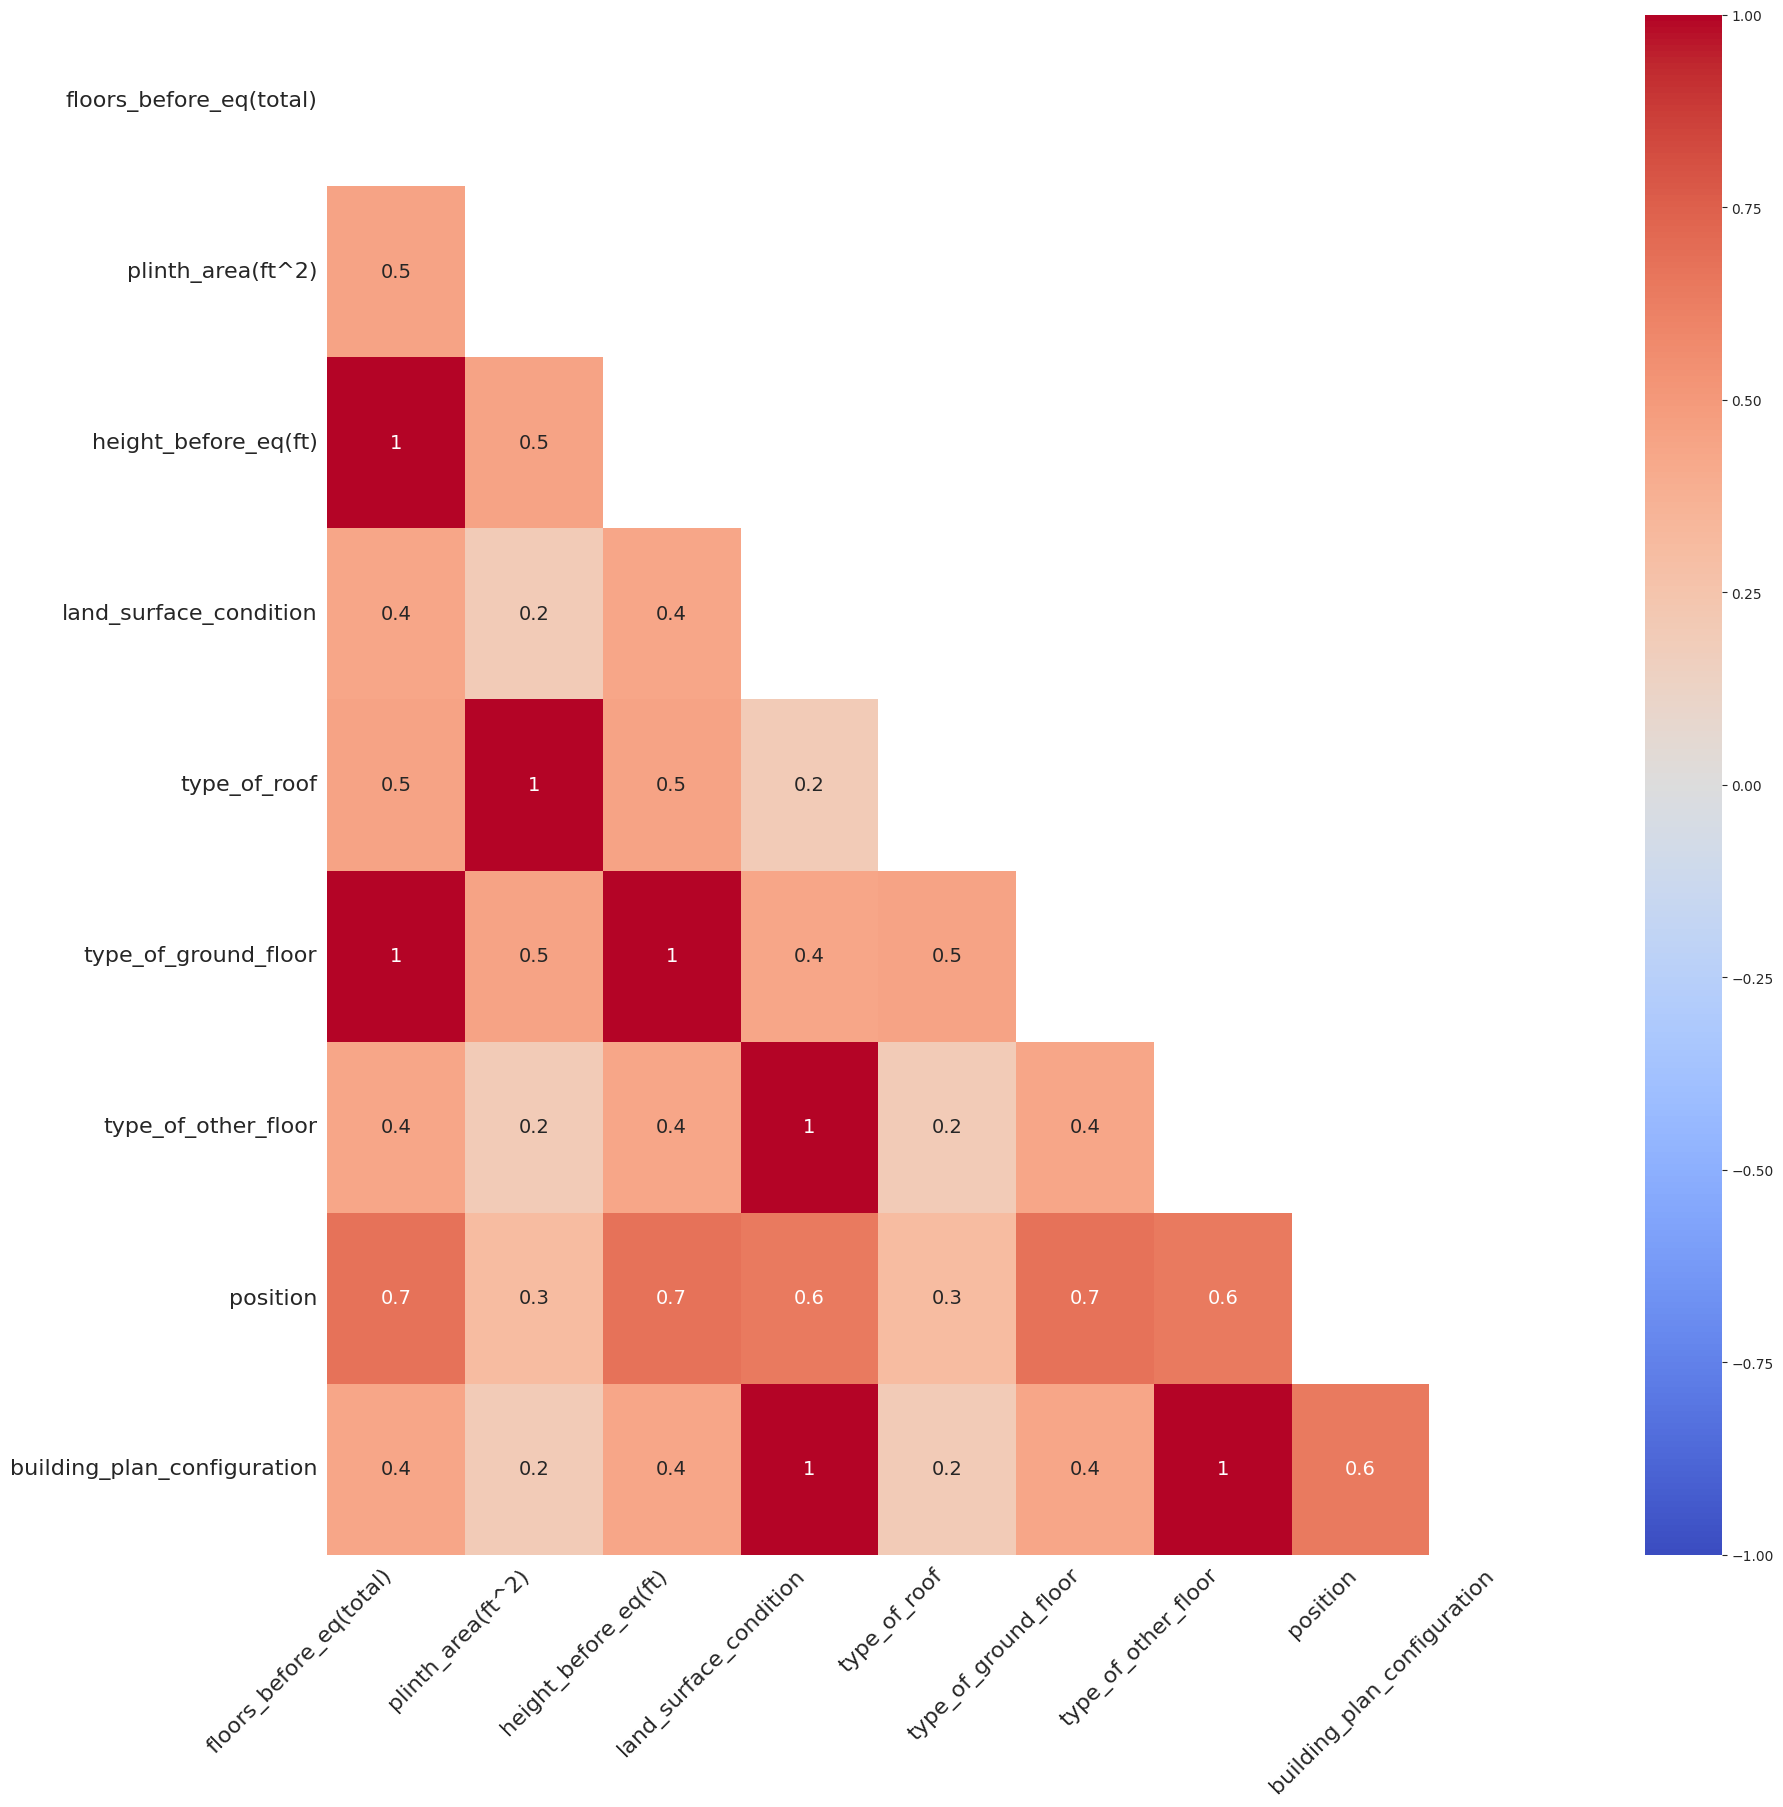

In [11]:
# plot correlation using mask and show the value in the cell using annot
msno.heatmap(train_data, figsize=(20, 20), cmap='coolwarm')

dari plotting diatas kita dapat menyimpulkan bahwa ada beberapa value yang memang tidak bisa dilakukan proses imputasi.

### Automated imputer

In [12]:
# melakukan imputasi ke data yang memiliki skewness rendah
from sklearn.impute import SimpleImputer
impute_mode = SimpleImputer(strategy = 'most_frequent')
impute_median = SimpleImputer(strategy = 'median')
train_data['floors_before_eq(total)'] = impute_median.fit_transform(train_data[['floors_before_eq(total)']])
train_data['plinth_area(ft^2)'] = impute_median.fit_transform(train_data[['plinth_area(ft^2)']])
train_data['type_of_roof'] = impute_mode.fit_transform(train_data[['type_of_roof']])

### imputer manual (progressive mode)

In [13]:
# fill missing value with groupby mode
train_data['legal_ownership_status'].\
    fillna(train_data.groupby(['residential_type','public_place_type'])['legal_ownership_status']\
           .transform(lambda x: x.mode()[0]), inplace=True)

train_data['position'].\
    fillna(train_data.groupby(['building_plan_configuration'])['position']\
           .transform(lambda x: x.mode()[0]), inplace=True)

train_data['type_of_ground_floor'].\
    fillna(train_data.groupby(['land_surface_condition'])['type_of_ground_floor']\
           .transform(lambda x: x.mode()[0]), inplace=True)

train_data['height_before_eq(ft)'].\
    fillna(train_data.groupby(['floors_before_eq(total)'])['height_before_eq(ft)']\
           .transform(lambda x: x.mode()[0]), inplace=True)

In [14]:
df = pd.DataFrame(train_data.dtypes, columns=['Data Type'])
df['Missing values'] = train_data.isnull().sum()
df['percentage'] = (df['Missing values'] / train_data.shape[0] * 100).round(2)
df

,Data Type,Missing values,percentage
floors_before_eq(total),float64,0,0.00
old_building,float64,0,0.00
plinth_area(ft^2),float64,0,0.00
height_before_eq(ft),float64,0,0.00
land_surface_condition,object,2146,0.64
type_of_foundation,object,0,0.00
type_of_roof,object,0,0.00
type_of_ground_floor,object,2146,0.64
type_of_other_floor,object,2146,0.64
position,float64,2146,0.64


terlihat pattern tidak biasa pada missing value, sehingga kami yakin bahwa pada row tersebut terdapat kesalahan dalam penginputan data.

### drop missing values that cannot be imputed

In [15]:
train_data.shape

(337601, 28)

In [16]:
# Drop row when has missing value
train_data = train_data.dropna(axis=0)

In [17]:
train_data.shape

(335455, 28)

sesuai dengan perkiraan kami, 2146 row tersebut terdapat kesalahan dalam penginputan data.

In [18]:
print("Missing values in each column: \n\n")
df = pd.DataFrame(train_data.isnull().sum(), columns=['Missing values'])
df['percentage'] = (df['Missing values'] / train_data.shape[0] * 100).round(2)
df['skewness'] = eda_for_missing_val.skew()
df['kurtosis'] = eda_for_missing_val.kurtosis()
df

Missing values in each column: 




,Missing values,percentage,skewness,kurtosis
floors_before_eq(total),0,0.0,0.441551,1.618901
old_building,0,0.0,13.793141,201.984045
plinth_area(ft^2),0,0.0,0.836914,1.229584
height_before_eq(ft),0,0.0,2.531808,25.754589
land_surface_condition,0,0.0,2.971102,9.018174
type_of_foundation,0,0.0,-0.320625,3.380790
type_of_roof,0,0.0,0.674071,0.455273
type_of_ground_floor,0,0.0,2.033215,3.425008
type_of_other_floor,0,0.0,-0.927180,0.138090
position,0,0.0,2.017527,3.549724


In [20]:
print("Shape of train data: ", train_data.shape)
print("Shape of test data: ", test_data.shape)

Shape of train data:  (335455, 28)
Shape of test data:  (242082, 28)


## Export the cleaned data to csv file

In [21]:
train_data.to_csv('train_data.csv', index=False)
test_data.to_csv('test_data.csv', index=False)